In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

train_data_processed = []
for idx in range(1, 5):
    train_data = pd.read_csv(rf"train_FD00{idx}.txt",sep=" ",header=None)
    train_data.drop(columns=[26,27],inplace=True)

    train_data.columns = columns
    train_data.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','TRA','farB','epr'],inplace=True)
    train_data['RUL'] = train_data['time_in_cycles'] / train_data.groupby('unit_number')['time_in_cycles'].transform('max')

    train_data.drop(columns=['unit_number', 'setting_1', 'setting_2'],inplace=True)

    train_data_processed.append(train_data)
    print(f"Processed train_FD00{idx}.txt, number of rows: {train_data.shape[0]}")
train_data_processed = pd.concat(train_data_processed, ignore_index=True)

Processed train_FD001.txt, number of rows: 20631
Processed train_FD002.txt, number of rows: 53759
Processed train_FD003.txt, number of rows: 24720
Processed train_FD004.txt, number of rows: 61249


In [3]:
train_data_processed

,time_in_cycles,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,RUL
0,1,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,0.005208
1,2,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,0.010417
2,3,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,0.015625
3,4,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,0.020833
4,5,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,0.026042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160354,251,605.33,1516.36,1315.28,15.46,404.59,2319.66,8840.16,46.08,380.16,2388.73,8185.69,8.4541,372,29.11,17.5234,0.984314
160355,252,643.42,1598.92,1426.77,21.57,567.59,2388.47,9117.12,48.04,535.02,2388.46,8185.47,8.2221,396,39.38,23.7151,0.988235
160356,253,643.68,1607.72,1430.56,21.57,569.04,2388.51,9126.53,48.24,535.41,2388.48,8193.94,8.2525,395,39.78,23.8270,0.992157
160357,254,555.77,1381.29,1148.18,7.96,199.93,2223.78,8403.64,42.53,187.92,2388.83,8125.64,9.0515,337,15.26,9.0774,0.996078


In [4]:
X = train_data_processed.drop(columns=['RUL'])
y = train_data_processed['RUL']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train RandomForest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Save with pickle
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("random_forest_model.pkl", "rb") as f:
    model = pickle.load(f)

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.00406724161162981


# Testing on the test-dataset

In [ ]:
test_data_processed = []

for idx in range(1,5):

    test_data_rul = pd.read_csv(rf"RUL_FD00{idx}.txt",sep=" ",header=None)
    test_data = pd.read_csv(rf"test_FD00{idx}.txt",sep=" ",header=None)


    test_data.drop(columns=[26,27],inplace=True)
    columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
            'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

    test_data.columns = columns
    test_data.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','TRA','farB','epr'],inplace=True)

    eol = []
    for un in test_data['unit_number'].unique():
        temp_data = test_data[test_data['unit_number'] == un]
        eol_temp = test_data_rul.iloc[un-1].values[0]
        eol_temp_list = [eol_temp for i in range(len(temp_data))]

        eol.extend(eol_temp_list)


    test_data['RUL'] = test_data['time_in_cycles'].values / (test_data.groupby('unit_number')['time_in_cycles'].transform('max').values + eol)
    test_data.drop(columns=['unit_number', 'setting_1', 'setting_2'],inplace=True)

    test_data_processed.append(test_data)

    print(f"Processed test_FD00{idx}.txt, number of rows: {test_data.shape[0]}")
test_data_processed = pd.concat(test_data_processed, ignore_index=True)


Processed test_FD001.txt, number of rows: 13096
Processed test_FD002.txt, number of rows: 33991
Processed test_FD003.txt, number of rows: 16596
Processed test_FD004.txt, number of rows: 41214


In [ ]:
X_test = test_data_processed.drop(columns=['RUL'])
y_test = test_data_processed['RUL']

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0049310750637151565


# Visualize Test Results

In [ ]:
fd_001_test_rul = pd.read_csv(r"RUL_FD002.txt",sep=" ",header=None)
fd_001_test = pd.read_csv(r"test_FD002.txt",sep=" ",header=None)
fd_001_test.drop(columns=[26,27],inplace=True)
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

fd_001_test.columns = columns
fd_001_test.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','TRA','farB','epr'],inplace=True)

eol = []
for un in fd_001_test['unit_number'].unique():
    temp_data = fd_001_test[fd_001_test['unit_number'] == un]
    eol_temp = fd_001_test_rul.iloc[un-1].values[0]
    eol_temp_list = [eol_temp for i in range(len(temp_data))]

    eol.extend(eol_temp_list)


fd_001_test['RUL'] = fd_001_test['time_in_cycles'].values /  (fd_001_test.groupby('unit_number')['time_in_cycles'].transform('max').values + eol)

print(f"total number of unique engines:{fd_001_test['unit_number'].unique()}")



total number of unique engines:[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239

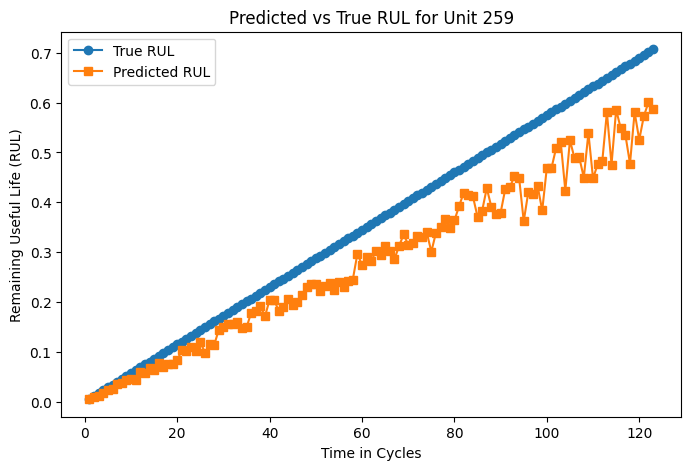

In [ ]:
from IPython.display import display, clear_output
import time
# Plot predicted vs true RUL for a specific unit_number
# unit_id = fd_001_test['unit_number'].unique()[17]  # Select the first unit_number

for unit_id in fd_001_test['unit_number'].unique():
    unit_data = fd_001_test[fd_001_test['unit_number'] == unit_id]
    true_rul = unit_data['RUL']
    pred_rul = model.predict(unit_data.drop(columns=['unit_number', 'setting_1', 'setting_2', 'RUL']))

    plt.figure(figsize=(8, 5))
    plt.plot(unit_data['time_in_cycles'], true_rul, label='True RUL', marker='o')
    plt.plot(unit_data['time_in_cycles'], pred_rul, label='Predicted RUL', marker='s')
    plt.xlabel('Time in Cycles')
    plt.ylabel('Remaining Useful Life (RUL)')
    plt.title(f'Predicted vs True RUL for Unit {unit_id}')
    plt.legend()
    clear_output(wait=True)
    time.sleep(1)
    plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assume 'y_test' are your true RUL values from the test set.
# Assume 'y_pred' are the predictions made by your Random Forest model.
# Example: y_pred = your_random_forest_model.predict(X_test)

# --- Standard Regression Metrics ---

# Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)


# --- Custom Accuracy Metric ---

# Set your desired tolerance (e.g., 0.05 or 0.10)
absolute_tolerance = 0.10

# Calculate the percentage of predictions within the fixed tolerance
absolute_errors = np.abs(y_pred - y_test)
within_tolerance_fixed = absolute_errors < absolute_tolerance
accuracy_fixed = np.mean(within_tolerance_fixed) * 100


# --- Print All Results ---

print(f"--- Random Forest Model Performance ---")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"R-squared (R²) Score: {r2:.6f}")
print(f"Accuracy with tolerance of ±{absolute_tolerance}: {accuracy_fixed:.2f}%")

--- Random Forest Model Performance ---
Mean Squared Error (MSE): 0.004931
Root Mean Squared Error (RMSE): 0.070222
Mean Absolute Error (MAE): 0.050735
R-squared (R²) Score: 0.913295
Accuracy with tolerance of ±0.1: 85.06%
